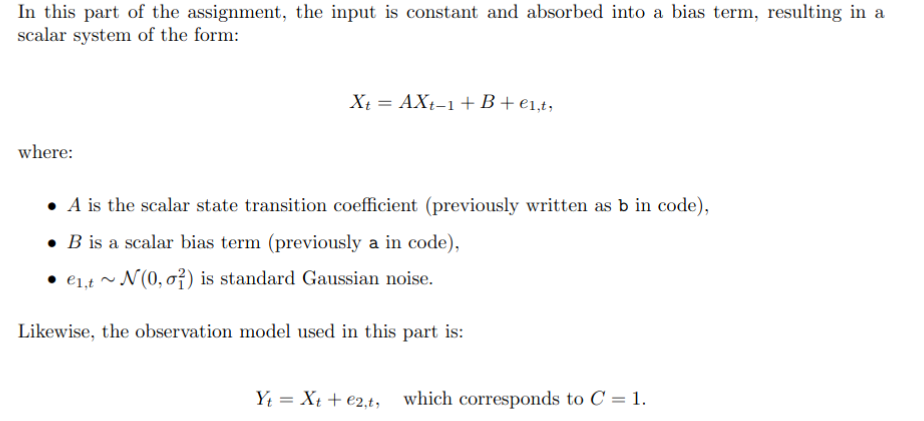

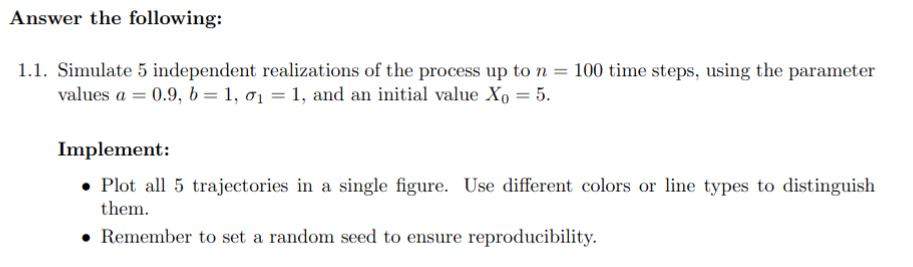

In [2]:
# parameters for simulation
a <- matrix(c(0.9),nrow=1)
b <- matrix(c(1),nrow=1)
c <- matrix(c(1),nrow=1)
sigma1 <- matrix(c(1),nrow=1)

# Initial value
x0 <- matrix(c(5),nrow=1)

# Number of observations
n <- 100

# Vector of observations
x <- rep(NA,n)
y <- rep(NA,n)


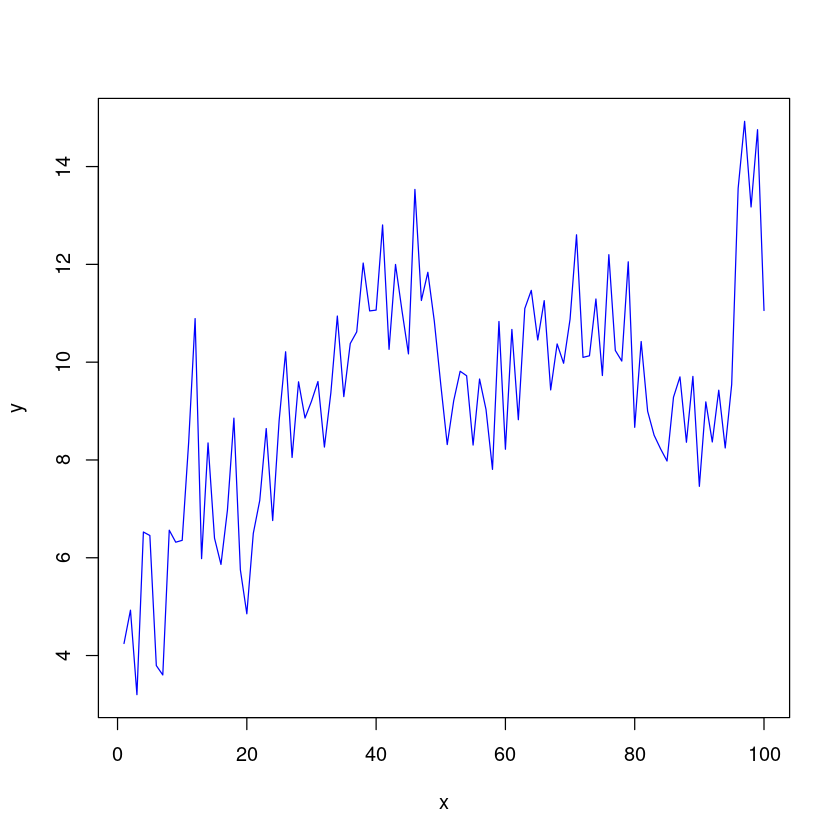

In [3]:
# set seed
set.seed(25)

# Run simulation
x[1] <- a*x0 + b + rnorm(1,0,sigma1)
y[1] <- c*x[1] + rnorm(1,0,sigma1)
for (i in 2:n){
    x[i] <- a*x[i-1] + b + rnorm(1,0,sigma1)
    y[i] <- c*x[i] + rnorm(1,0,sigma1)
}

time <- 1:n

# Plot the data
par(bg="white")
plot(time, y,type = "l", pch=19, col="blue", xlab="x", ylab="y")

png 
  3

pdf 
  2

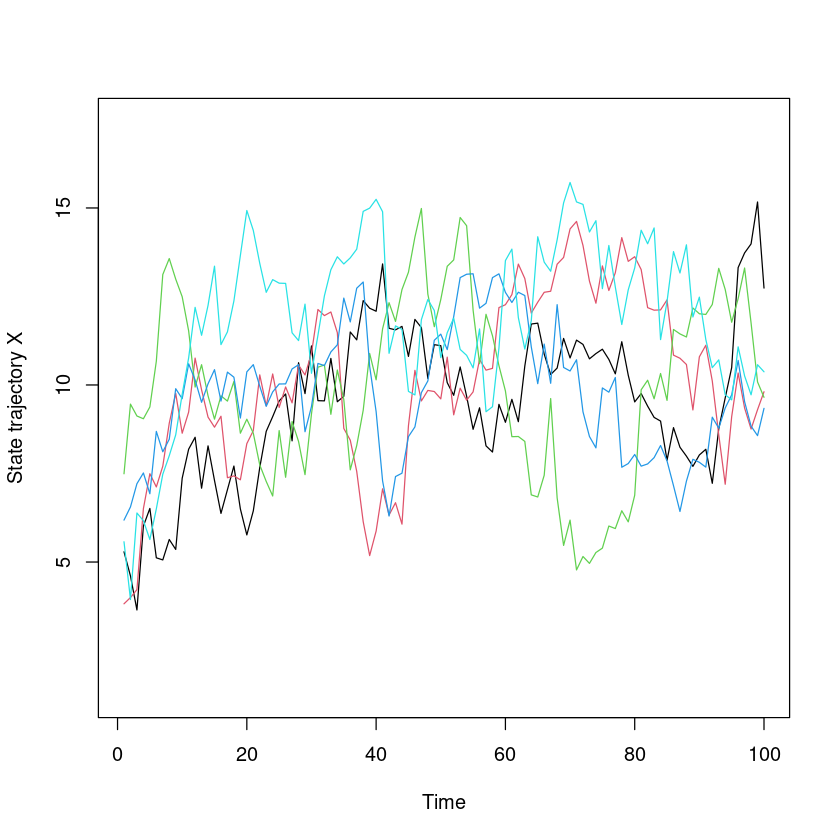

In [9]:
# 5 realizations
x_5 <- matrix(NA, nrow=n, ncol=5)
y_5 <- matrix(NA, nrow=n, ncol=5)
# set seed
set.seed(25)

# Run simulation

for (j in 1:5){
x_5[1,j] <- a*x0 + b + rnorm(1,0,sigma1)
    for (i in 2:n){
        x_5[i,j] <- a*x_5[i-1,j] + b + rnorm(1,0,sigma1)
        y_5[i,j] <- c*x_5[i,j] + rnorm(1,0,sigma1)
    }
}

# Plot the data
par(bg="white")
plot(time, x,type = "l", pch=19, col="black", xlab="Time", ylab="State trajectory X", ylim = range(y_5,na.rm = TRUE))
for (j in 2:5){
    lines(1:n, x_5[,j], col= j)
}
# save the plot
dev.copy(png, filename = "1_1.png", width = 600, height = 450)
dev.off()

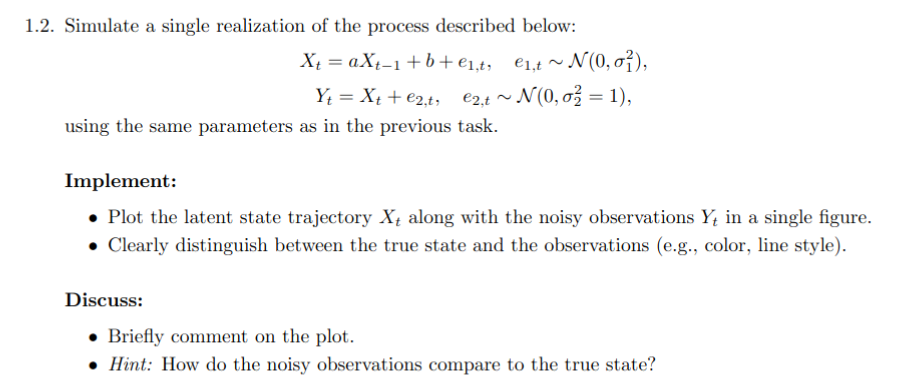

png 
  3

pdf 
  2

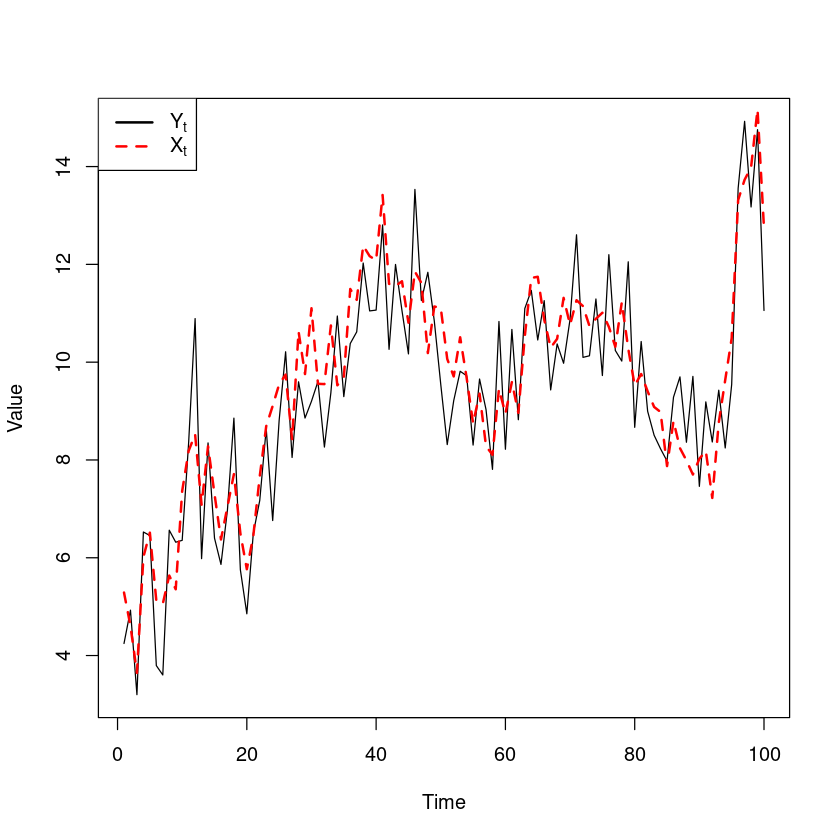

In [5]:
par(bg = "white")
plot(time, y, type = "l", pch=19, col="black", xlab="Time", ylab="Value", ylim = range(y,na.rm = TRUE))
lines(time, x, lty = 2, lwd = 2, pch = 19, col="red")
legend("topleft", legend=c(expression(Y[t]), expression(X[t])), col=c("black", "red"), lty=c(1, 2), lwd=c(2, 2))
# save the plot
dev.copy(png, filename = "1_2.png", width = 600, height = 450)
dev.off()

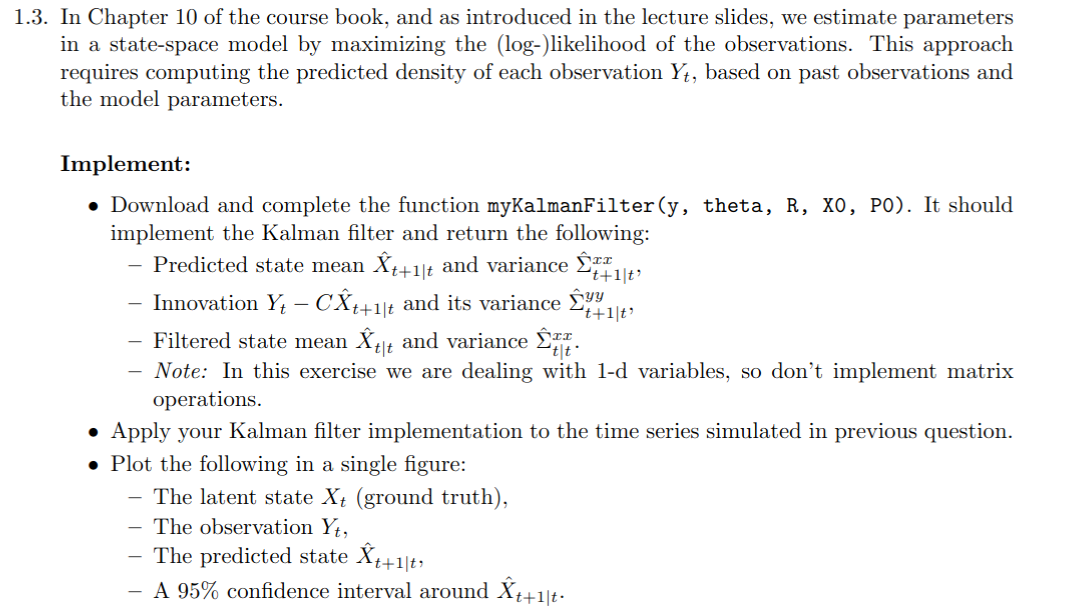

png 
  3

pdf 
  2

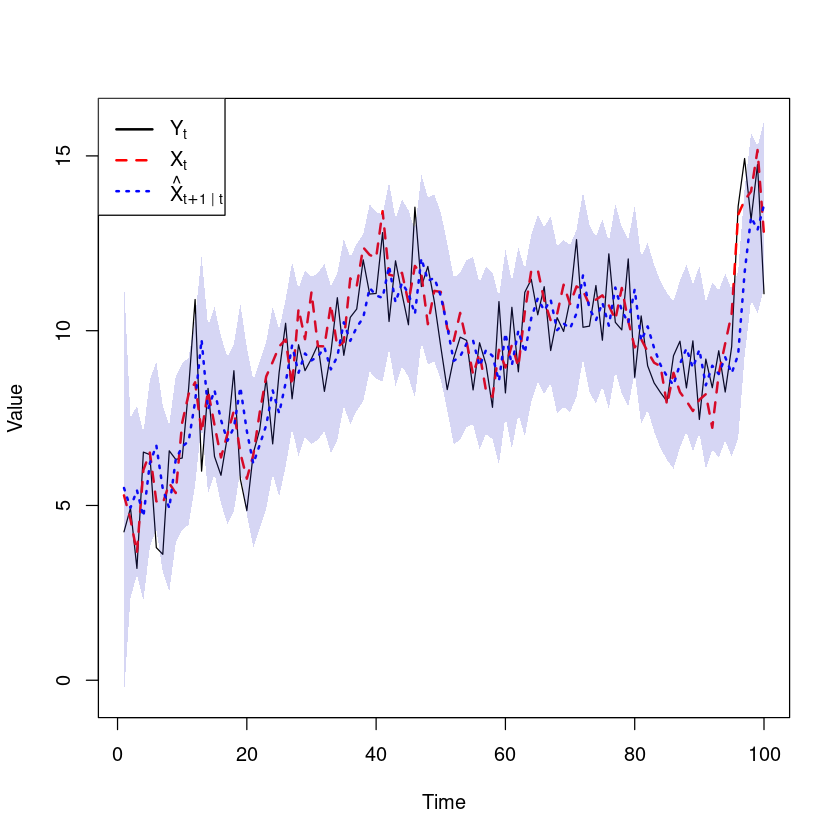

In [6]:
# include functions
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

# apply kalman filter
results <- oiaKalmanFilter(y = y, theta = c(b,a,sigma1), R = 1, x_prior = x0, P_prior = 10)
# returnes list 
#return(list(
#    x_pred = x_pred,
#    P_pred = P_pred,
#    x_filt = x_filt,
#    P_filt = P_filt,
#    innovation = innovation,
#    innovation_var = innovation_var

# 95 % prediction interval
z_value <- 1.96  # 95% confidence interval approx normal dist because of large n 

upper <- rep(NA,n)
lower <- rep(NA,n)
for (i in time){
    se <- sqrt(results$P_pred[i]) # prediction error variance (from the Kalman filter)

    upper[i] <- results$x_pred[i] + z_value * se
    lower[i] <- results$x_pred[i] - z_value * se
}

# right plot
par(bg = "white")
plot(time, y, type = "l", pch=19, col="black", xlab="Time", ylab="Value", ylim = range(upper,lower,na.rm = TRUE))
lines(time, x, lty = 2, lwd = 2, pch = 19, col="red")
lines(time,results$x_pred, lty = 3, lwd = 2, pch = 19, col="blue")
#color area corresponding to confidence interval
polygon(c(1:(n), rev(1:(n))), c(upper, rev(lower)), col=rgb(0.2,0.2,0.8,0.2), border=NA)

legend("topleft", legend=c(expression(Y[t]), expression(X[t]), expression(hat(X)[t+1~"|"~t])),
    col=c("black", "red", "blue"), lty=c(1, 2, 3), lwd=c(2, 2, 2))
# save the plot
dev.copy(png, filename = "1_3.png", width = 600, height = 450)
dev.off()


In [7]:
print(data.frame(Time = 1:n, Observed = y, TrueState = x, Predicted = results$x_pred))

    Time  Observed TrueState Predicted
1      1  4.246575  5.288166  5.500000
2      2  4.927574  4.606042  4.933609
3      3  3.199775  3.645308  5.436806
4      4  6.526118  6.014823  4.680875
5      5  6.455094  6.512985  6.205937
6      6  3.793946  5.118899  6.719325
7      7  3.602691  5.059075  5.474486
8      8  6.563434  5.635855  4.920634
9      9  6.317900  5.355500  6.311849
10    10  6.356071  7.365835  6.683917
11    11  8.355443  8.186662  6.839254
12    12 10.891019  8.523255  7.970533
13    13  5.981751  7.085285  9.743727
14    14  8.347862  8.279543  7.746666
15    15  6.400846  7.302121  8.295242
16    16  5.863292  6.373455  7.447165
17    17  6.974479  7.042356  6.850853
18    18  8.854814  7.710323  7.232237
19    19  5.754271  6.499679  8.381419
20    20  4.853640  5.765450  7.130747
21    21  6.497922  6.443379  6.193348
22    22  7.172616  7.668438  6.737773
23    23  8.642300  8.690578  7.297796
24    24  6.761049  9.105962  8.290912
25    25  8.810796  9.547